# LEARNING PYTORCH WITH EXAMPLES

原始文档位置：https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
    
Author: Justin Johnson

目标：通过例子掌握Pytorch的核心功能（n维度张量Tensor和自动求导功能）

例子：

- 用3阶多项式拟合$y=sin(x)$，所以要训练三个参数
- 涉及基于随机数据的梯度下降

我的补充：做了点可视化。

## Tensor张量

### 先热身一下，康康numpy

首先我们用np来处理一下这个问题的解法

Numpy同样提供了n维度数组，有科学计算相关函数，但是不涉及计算图（computation graphs），也不了解梯度和深度学习，但是对于三阶多项式我们可以手动实现前向和反向传播。

这里推导一下：

$$
\hat y = a+bx+cx^2+dx^3,L(y,\hat y) = \lVert y-\hat y\rVert_2^2
$$

$$
\frac{\partial L}{\partial a} =  \frac{\partial L}{\partial \hat y} \times \frac{\hat y}{\partial a}
$$

In [1]:
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)#一个周期内的
y = np.sin(x)#对应理论y

# Randomly initialize weights
np.random.seed(2333)#设置个种子
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6#学习率
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(f'迭代第{t:4d}轮, 损失函数为{loss:7.3f}')

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y) #损失对y求导
    grad_a = grad_y_pred.sum() #y再对参数求导
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights 梯度下降更新
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'结果Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

迭代第  99轮, 损失函数为965.462
迭代第 199轮, 损失函数为666.340
迭代第 299轮, 损失函数为461.254
迭代第 399轮, 损失函数为320.481
迭代第 499轮, 损失函数为223.744
迭代第 599轮, 损失函数为157.192
迭代第 699轮, 损失函数为111.356
迭代第 799轮, 损失函数为 79.753
迭代第 899轮, 损失函数为 57.940
迭代第 999轮, 损失函数为 42.868
迭代第1099轮, 损失函数为 32.443
迭代第1199轮, 损失函数为 25.226
迭代第1299轮, 损失函数为 20.223
迭代第1399轮, 损失函数为 16.753
迭代第1499轮, 损失函数为 14.343
迭代第1599轮, 损失函数为 12.668
迭代第1699轮, 损失函数为 11.503
迭代第1799轮, 损失函数为 10.692
迭代第1899轮, 损失函数为 10.127
迭代第1999轮, 损失函数为  9.732
结果Result: y = 0.029051463916955143 + 0.8443705863612246 x + -0.0050118609441209775 x^2 + -0.09157082774438041 x^3


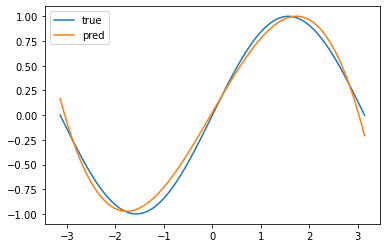

In [2]:
import matplotlib.pyplot as plt
plt.plot(x,y,label='true')
plt.plot(x,y_pred,label='pred')
plt.legend()

### 换成张量

In [3]:
import torch
import math


dtype = torch.float #需要指定一下数据类型
#device = torch.device("cpu")
device = torch.device("cuda:0") # GPU版本

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
torch.manual_seed(233) #这是torch的随机数（全局一致）
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()#要用item才能得到标量数值
    if t % 100 == 99:
        print(f'迭代第{t:4d}轮, 损失函数为{loss:7.3f}')

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'结果Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

迭代第  99轮, 损失函数为158.029
迭代第 199轮, 损失函数为107.563
迭代第 299轮, 损失函数为 74.170
迭代第 399轮, 损失函数为 52.073
迭代第 499轮, 损失函数为 37.449
迭代第 599轮, 损失函数为 27.770
迭代第 699轮, 损失函数为 21.364
迭代第 799轮, 损失函数为 17.124
迭代第 899轮, 损失函数为 14.318
迭代第 999轮, 损失函数为 12.459
迭代第1099轮, 损失函数为 11.229
迭代第1199轮, 损失函数为 10.415
迭代第1299轮, 损失函数为  9.875
迭代第1399轮, 损失函数为  9.518
迭代第1499轮, 损失函数为  9.282
迭代第1599轮, 损失函数为  9.125
迭代第1699轮, 损失函数为  9.021
迭代第1799轮, 损失函数为  8.952
迭代第1899轮, 损失函数为  8.907
迭代第1999轮, 损失函数为  8.877
结果Result: y = -0.0016615603817626834 + 0.8494040369987488 x + 0.00028664592537097633 x^2 + -0.09228679537773132 x^3


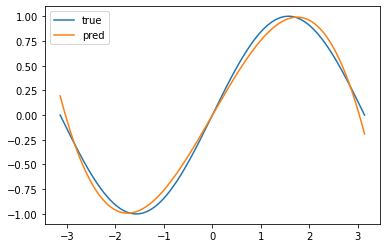

In [4]:
import matplotlib.pyplot as plt
plt.plot(x.cpu().numpy(),y.cpu().numpy(),label='true')#先转换到cpu，然后再转换到numpy才可以做一般的可视化
plt.plot(x.cpu().numpy(),y_pred.cpu().numpy(),label='pred')
plt.legend()

## 自动求梯度Autograd

### 张量的自动求梯度

上面是手搓的方式，但是如果层数多了会复杂，所以可以用自动微分工具。前向传播时候，会定义一个计算图computational graph，节点是张量，边是函数，然后对图进行反向传播。

这听起来复杂，但是实操只需要设置`requires_grad=True`可以用`.grad`提取对应的梯度（也是张量）

首先简单的用grad代替手搓

In [5]:
torch.manual_seed(233) #重新调用一次这个函数，那么后续随机又从这个开始，否则在一组种子下的结果也是不一样的
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(f'迭代第{t:4d}轮, 损失函数为{loss:7.3f}')

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    #直接一个函数就能反向传播，所有可求梯度的都会反向传播
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.权重的requires_grad参数为真但是我们这里只是更新，不需要跟踪记录梯度
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        # 手动清除梯度有点离谱，非主流操作
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

迭代第  99轮, 损失函数为158.029
迭代第 199轮, 损失函数为107.563
迭代第 299轮, 损失函数为 74.170
迭代第 399轮, 损失函数为 52.073
迭代第 499轮, 损失函数为 37.449
迭代第 599轮, 损失函数为 27.770
迭代第 699轮, 损失函数为 21.364
迭代第 799轮, 损失函数为 17.124
迭代第 899轮, 损失函数为 14.318
迭代第 999轮, 损失函数为 12.459
迭代第1099轮, 损失函数为 11.229
迭代第1199轮, 损失函数为 10.415
迭代第1299轮, 损失函数为  9.875
迭代第1399轮, 损失函数为  9.518
迭代第1499轮, 损失函数为  9.282
迭代第1599轮, 损失函数为  9.125
迭代第1699轮, 损失函数为  9.021
迭代第1799轮, 损失函数为  8.952
迭代第1899轮, 损失函数为  8.907
迭代第1999轮, 损失函数为  8.877
Result: y = -0.0016615603817626834 + 0.8494040369987488 x + 0.00028664592537097633 x^2 + -0.09228679537773132 x^3


## 进阶--构建一个新的autograd函数

这里的公式进行了更改，换成了$y=a+bP_3(c+dx)$，其中$P_3(x)=0.5(5x^3-3x)$为三阶勒让德多项式。

In [11]:
class LegendrePolynomial3(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    可以继承torch.autograd.Function来实现我们自己的子类
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        前向传播时，我们得到一个输入，并给出前向传播的输出
        ctx是一个内容对象，可以用于存放反向传播的计算信息
        你可以用ctx.save_for_backward存储任意的对象
        """
        ctx.save_for_backward(input)#存下输入
        return 0.5 * (5 * input ** 3 - 3 * input)#前向计算

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        在反向传播时，我们收到一个损失对于输出的梯度，据此计算损失对于输入的梯度
        """
        input, = ctx.saved_tensors#提取原始输入
        return grad_output * 1.5 * (5 * input ** 2 - 1)#按照公式解析解计算反向传播



# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
#创建输入数据和目标y，默认的创建张量不含梯度
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For this example, we need
# 4 weights: y = a + b * P3(c + d * x), these weights need to be initialized
# not too far from the correct result to ensure convergence.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
# 创建向量，和之前的区别在于参数是非随机初始化的
# 这里的创建函数是创建()形状的Tensor，采用统一数值填充
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

learning_rate = 5e-6 #学习率变了不知道为什么
for t in range(2000):
    # To apply our Function, we use Function.apply method. We alias this as 'P3'.
    # 对于自定义的torch.autograd.Function子类，我们需要获取他的apply方法来使用
    P3 = LegendrePolynomial3.apply

    # Forward pass: compute predicted y using operations; we compute
    # P3 using our custom autograd operation.
    #用我们自己写好的进行前向传播
    y_pred = a + b * P3(c + d * x)

    # Compute and print loss
    #计算损失
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(f'迭代第{t:4d}轮, 损失函数为{loss:7.3f}')

    # Use autograd to compute the backward pass.
    #还是直接反向传播
    loss.backward()

    # Update weights using gradient descent
    #更新权重
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        # 同样手动清除梯度
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

迭代第  99轮, 损失函数为209.958
迭代第 199轮, 损失函数为144.660
迭代第 299轮, 损失函数为100.702
迭代第 399轮, 损失函数为 71.035
迭代第 499轮, 损失函数为 50.979
迭代第 599轮, 损失函数为 37.403
迭代第 699轮, 损失函数为 28.207
迭代第 799轮, 损失函数为 21.973
迭代第 899轮, 损失函数为 17.746
迭代第 999轮, 损失函数为 14.878
迭代第1099轮, 损失函数为 12.932
迭代第1199轮, 损失函数为 11.611
迭代第1299轮, 损失函数为 10.714
迭代第1399轮, 损失函数为 10.105
迭代第1499轮, 损失函数为  9.692
迭代第1599轮, 损失函数为  9.411
迭代第1699轮, 损失函数为  9.221
迭代第1799轮, 损失函数为  9.091
迭代第1899轮, 损失函数为  9.003
迭代第1999轮, 损失函数为  8.944
Result: y = -0.0000 + -2.2085 * P3(0.0000 + 0.2555 x)


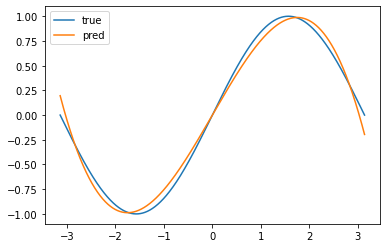

In [8]:
import matplotlib.pyplot as plt
plt.plot(x.cpu().numpy(),y.cpu().numpy(),label='true')#先转换到cpu，然后再转换到numpy才可以做一般的可视化
plt.plot(x.cpu().numpy(),y_pred.detach().cpu().numpy(),label='pred')
#由于这里y_pred涉及反向传播，所以是要先detach()接触和计算图的联系
plt.legend()

## 基于nn的方法

在我们组织深度学习神经网络的时候，往往会安排层layers，这些层部分会包含可学习的参数，可被优化。

在Pytorch中nn起到这个作用，提供一系列模块modules的定义，可以大致相当于神经网络的层，一个模块接受输入张量并计算输出张量，同时会存储中间内部状态比如可学习参数，也定义了一些常见的损失函数。

下面我们实现一个多项式网络的nn模块。

In [15]:
# unsqueeze用法
x2 = torch.linspace(-math.pi, math.pi, 5)
print(x2.shape)
x2

torch.Size([5])


tensor([-3.1416, -1.5708,  0.0000,  1.5708,  3.1416])

In [16]:
print(x2.unsqueeze(0).shape)
x2.unsqueeze(0)#向0索引维度前插入了一个维度的1X

torch.Size([1, 5])


tensor([[-3.1416, -1.5708,  0.0000,  1.5708,  3.1416]])

In [17]:
print(x2.unsqueeze(-1).shape)
x2.unsqueeze(-1)#向后插入了一个维度的1X，
#这个是因为采用负数索引和一般python类似，是从后往前记录位置

torch.Size([5, 1])


tensor([[-3.1416],
        [-1.5708],
        [ 0.0000],
        [ 1.5708],
        [ 3.1416]])

In [18]:
print(x2.unsqueeze(1).shape)
x2.unsqueeze(1)#在只有一个维度时候-1和1等效，但是无论任何原始维数，-1都代表插入在末尾

torch.Size([5, 1])


tensor([[-3.1416],
        [-1.5708],
        [ 0.0000],
        [ 1.5708],
        [ 3.1416]])

In [19]:
p2 = torch.tensor([1, 2, 3])
x2.unsqueeze(-1).pow(p2)

tensor([[ -3.1416,   9.8696, -31.0063],
        [ -1.5708,   2.4674,  -3.8758],
        [  0.0000,   0.0000,   0.0000],
        [  1.5708,   2.4674,   3.8758],
        [  3.1416,   9.8696,  31.0063]])

In [20]:
x2.pow(p2)#这样不可以，因为两者都是向量的时候，不会触发广播，而是被认为向量内积
#必须先有一方是矩阵才可以实践广播

RuntimeError: The size of tensor a (5) must match the size of tensor b (3) at non-singleton dimension 0

In [10]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).

# 这里是在准备多项式的元素(x, x^2, x^3)，有了多项式元素后面就只需要求线性的系数
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)# 在维度上插入一个1X，这里是插在最后拓展维度

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 
# 拓展后的xx是2000X1和3的广播操作，得到2000X3

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
# 调用了nn的功能来操作，先进一个3->1的线性层（没激活函数）然后再拉平
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)#默认从1坐标维度开始拉平，因为0坐标是batch维度，
    #但是这里没有batch直接来，所以从0开始拉平
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
# 直接使用MSE损失来进行求损失
loss_fn = torch.nn.MSELoss(reduction='sum')#reduction选择sum其实就是SE，没有求mean

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    # Pytorch的nn重载了函数调用操作，变成了前向传播，所以可以直接用括号来前向
    # 等价于 model.forward(xx)
    y_pred = model(xx) #直接从model得到前向输出

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    # 用nn的函数计算前向传播（所以这里要用item取标量）
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(f'迭代第{t:4d}轮, 损失函数为{loss.item():7.3f}')

    # Zero the gradients before running the backward pass.
    # 每次反向传播前先清除旧有梯度（替代原本手动的设置None）
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    # 一键式反向传播
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    # 此次暂时还是采用手动更新梯度下降，但是变成了对于参数的遍历更新
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
# 用这种方式可以取Sequence的层
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
# 那就有权重和偏置项bias
print(f'Result: y = \
      {linear_layer.bias.item()} + \
      {linear_layer.weight[:, 0].item()} x + \
      {linear_layer.weight[:, 1].item()} x^2 +\
      {linear_layer.weight[:, 2].item()} x^3')

迭代第  99轮, 损失函数为975.284
迭代第 199轮, 损失函数为656.037
迭代第 299轮, 损失函数为442.554
迭代第 399轮, 损失函数为299.704
迭代第 499轮, 损失函数为204.052
迭代第 599轮, 损失函数为139.958
迭代第 699轮, 损失函数为 96.980
迭代第 799轮, 损失函数为 68.137
迭代第 899轮, 损失函数为 48.766
迭代第 999轮, 损失函数为 35.746
迭代第1099轮, 损失函数为 26.986
迭代第1199轮, 损失函数为 21.088
迭代第1299轮, 损失函数为 17.113
迭代第1399轮, 损失函数为 14.431
迭代第1499轮, 损失函数为 12.620
迭代第1599轮, 损失函数为 11.396
迭代第1699轮, 损失函数为 10.568
迭代第1799轮, 损失函数为 10.007
迭代第1899轮, 损失函数为  9.627
迭代第1999轮, 损失函数为  9.369
Result: y =       -0.016600055620074272 +       0.8397484421730042 x +       0.002863785717636347 x^2 +      -0.09091337025165558 x^3


## 更进一步 优化器optim

先前都是手动在`torch.no_grad()`内部手动进行的梯度下降，但这种对于复杂的优化器写起来负担有点大。

所以可以利用优化器包来操作，提供了常见优化器的实现

这里我们使用RMSprop算法来优化

In [22]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.

learning_rate = 1e-3#学习率也换了一个
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)#设置优化器

for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(f'迭代第{t:4d}轮, 损失函数为{loss.item():7.3f}')

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()#清除梯度还是要有的，否则梯度会累积！

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()#之前的手动更新换成一个step就可以了。


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} +\
    {linear_layer.weight[:, 0].item()} x +\
    {linear_layer.weight[:, 1].item()} x^2 +\
    {linear_layer.weight[:, 2].item()} x^3')

迭代第  99轮, 损失函数为14396.074
迭代第 199轮, 损失函数为5160.179
迭代第 299轮, 损失函数为1659.509
迭代第 399轮, 损失函数为668.737
迭代第 499轮, 损失函数为504.679
迭代第 599轮, 损失函数为452.228
迭代第 699轮, 损失函数为390.950
迭代第 799轮, 损失函数为318.548
迭代第 899轮, 损失函数为242.547
迭代第 999轮, 损失函数为172.285
迭代第1099轮, 损失函数为113.885
迭代第1199轮, 损失函数为 69.550
迭代第1299轮, 损失函数为 39.060
迭代第1399轮, 损失函数为 20.798
迭代第1499轮, 损失函数为 12.082
迭代第1599轮, 损失函数为  9.299
迭代第1699轮, 损失函数为  8.854
迭代第1799轮, 损失函数为  8.853
迭代第1899轮, 损失函数为  8.881
迭代第1999轮, 损失函数为  8.938
Result: y = -0.0004799135494977236 +    0.8572459816932678 x +    -0.00047998171066865325 x^2 +    -0.09276171028614044 x^3


## 再进一步-自定义的nn子类模块

有时候我们需要更复杂的模块，不仅是简单的已有经典序列堆砌。我们只需要写一个前向传播即可。

In [23]:
import torch
import math


class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        我们需要初始化参数并赋值
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        前向传播这里需要接受一个参数输入，然后返回一个输出。
        我们可以用在模块内构造函数初始化时候定义的内容和任意的张量操作符
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        和一般python模块一样的，你也可以定义一些一般的方法比如str
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = Polynomial3()#创建模块的一个实例

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the nn.Linear
# module which is members of the model.

criterion = torch.nn.MSELoss(reduction='sum')
#损失函数如常
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
#同样构架一个优化器，这里用的SGD

for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)#前向

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(f'迭代第{t:4d}轮, 损失函数为{loss.item():7.3f}')

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()#和之前操作sequence一样的

print(f'Result: {model.string()}')#这是因为有个str方法

迭代第  99轮, 损失函数为 23.434
迭代第 199轮, 损失函数为 19.059
迭代第 299轮, 损失函数为 15.998
迭代第 399轮, 损失函数为 13.854
迭代第 499轮, 损失函数为 12.352
迭代第 599轮, 损失函数为 11.300
迭代第 699轮, 损失函数为 10.561
迭代第 799轮, 损失函数为 10.043
迭代第 899轮, 损失函数为  9.679
迭代第 999轮, 损失函数为  9.423
迭代第1099轮, 损失函数为  9.244
迭代第1199轮, 损失函数为  9.117
迭代第1299轮, 损失函数为  9.028
迭代第1399轮, 损失函数为  8.966
迭代第1499轮, 损失函数为  8.922
迭代第1599轮, 损失函数为  8.891
迭代第1699轮, 损失函数为  8.869
迭代第1799轮, 损失函数为  8.854
迭代第1899轮, 损失函数为  8.843
迭代第1999轮, 损失函数为  8.835
Result: y = 0.0044181933626532555 + 0.8558475375175476 x + -0.0007622094126418233 x^2 + -0.09320332109928131 x^3


## pytorch动态图的终极特色

为了举一个动态图和权重共享的例子，我们实现了一个很奇怪的模型：3-5阶的多项式公用同一个系数，每次而且3-5阶到底有多少阶每次是随机选取的。

我们可以在写前向传播的时候使用python的循环工作流，二权重共享只需要反复在前向使用同一个参数即可。

注：这里的方法会慢不少，而且结果有随机性其实很奇特，最后训练的e很小不同随机情况下其实差不多结果。
不过至少这个操作是只有动态图才可以的。


In [24]:
import random
import torch
import math


class DynamicNet(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate five parameters and assign them as members.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        For the forward pass of the model, we randomly choose either 4, 5
        and reuse the e parameter to compute the contribution of these orders.

        Since each forward pass builds a dynamic computation graph, we can use normal
        Python control-flow operators like loops or conditional statements when
        defining the forward pass of the model.

        Here we also see that it is perfectly safe to reuse the same parameter many
        times when defining a computational graph.
        """
        y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
        for exp in range(4, random.randint(4, 6)):
            y = y + self.e * x ** exp
        return y

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 ? + {self.e.item()} x^5 ?'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = DynamicNet()

# Construct our loss function and an Optimizer. Training this strange model with
# vanilla stochastic gradient descent is tough, so we use momentum
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, momentum=0.9)
for t in range(30000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 2000 == 1999:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

1999 148.21243286132812
3999 75.3135757446289
5999 39.994781494140625
7999 85.57655334472656
9999 16.68682861328125
11999 12.465984344482422
13999 10.491589546203613
15999 9.430222511291504
17999 9.277722358703613
19999 9.064362525939941
21999 8.600805282592773
23999 8.901012420654297
25999 8.87391471862793
27999 8.891538619995117
29999 8.854854583740234
Result: y = 0.0031547953840345144 + 0.8570186495780945 x + -0.0010799139272421598 x^2 + -0.09361018985509872 x^3 + 9.438759298063815e-05 x^4 ? + 9.438759298063815e-05 x^5 ?


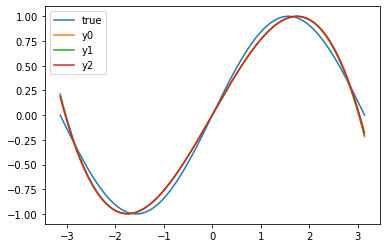

In [29]:
import matplotlib.pyplot as plt
y0 = model.a +  model.b * x +  model.c * x ** 2 +  model.d * x ** 3
y1 = y0 +  model.e*x ** 4
y2 = y1 + model.e*x ** 5
plt.plot(x.cpu().numpy(),y.cpu().numpy(),label='true',)#先转换到cpu，然后再转换到numpy才可以做一般的可视化
plt.plot(x.cpu().numpy(),y0.detach().cpu().numpy(),label='y0')
plt.plot(x.cpu().numpy(),y1.detach().cpu().numpy(),label='y1')
plt.plot(x.cpu().numpy(),y2.detach().cpu().numpy(),label='y2')
#由于这里y_pred涉及反向传播，所以是要先detach()接触和计算图的联系
plt.legend()